In [82]:
import numpy as np
import tables as tb
import random
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from   mpl_toolkits.mplot3d import Axes3D

from data_io.plot_utils import plot_3d_hits_double
from invisible_cities.io import dst_io    as dio

In [2]:
cutnum, num = '24', '6206'

# Explorando ESMERALDA

In [3]:
dir_esm = '/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut{cut}.esmeralda_{num}.root.h5'.format(cut = cutnum, num = num)

In [4]:
with tb.open_file(dir_esm) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut24.esmeralda_6206.root.h5 (File) ''
Last modif.: 'Sat Oct  9 14:53:36 2021'
Object Tree: 
/ (RootGroup) ''
/CHITS (Group) ''
/CHITS/highTh (Table(86919,), shuffle, zlib(4)) 'Hits'
/CHITS/lowTh (Table(280841,), shuffle, zlib(4)) 'Hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/high_th_select (Table(571,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/low_th_select (Table(571,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/topology_select (Table(571,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/extents (Table(571,), shuffle, zlib(4)) 'extents'
/MC/generators (Table(0,), shuffle, zlib(4)) 'generators'
/MC/hits (Table(143816,), shuffle, zlib(4)) 'hits'
/MC/particles (Table(17519,), shuffle, zlib(4)) 'particles'
/Run (Group) ''
/Run/events (Table(571,), shuffle, zlib(4)) 'event info table'
/Run/runInfo 

In [5]:
dio.load_dst(dir_esm, 'Tracking', 'Tracks')#.columns#['numb_of_tracks'].unique()

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,48000024,0,1.491870,55.980762,17,144,1,-5.0,125.0,279.156281,...,301.606133,13.173178,177.153213,288.885091,0.593690,0.385345,0.00000,15.0,15.0,15.0
1,48000025,0,1.715727,103.174728,31,174,1,-65.0,65.0,226.196750,...,230.259067,-9.759202,126.969686,277.554071,0.415407,0.188988,0.00000,15.0,15.0,15.0
2,48000026,0,1.459909,68.407169,21,153,1,-5.0,-95.0,260.050906,...,264.864288,3.331140,-45.000000,279.964029,0.561109,0.316067,0.00000,15.0,15.0,15.0
3,48000027,0,1.756891,47.193966,15,162,1,25.0,-35.0,379.193719,...,383.948543,65.000000,-28.424797,409.384885,0.763692,0.437802,0.00000,15.0,15.0,15.0
4,48000028,0,1.486615,114.155490,21,116,1,85.0,55.0,257.039969,...,261.944577,85.000000,120.777076,318.438172,0.355191,0.173478,0.00000,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,48000593,2,0.061730,0.000000,1,1,3,-115.0,85.0,189.783719,...,189.783719,-115.000000,85.000000,189.783719,0.061730,0.061730,0.06173,15.0,15.0,15.0
796,48000595,0,1.604293,98.407169,33,132,1,75.0,25.0,6.210953,...,45.809710,90.107089,55.000000,51.107624,0.527633,0.199949,0.00000,15.0,15.0,15.0
797,48000596,0,1.783848,145.601135,35,190,2,5.0,35.0,166.121250,...,178.944797,7.404423,85.000000,222.306874,0.423356,0.152640,0.00000,15.0,15.0,15.0
798,48000596,1,0.012840,0.000000,1,2,2,125.0,105.0,171.826219,...,171.826219,129.878029,105.000000,171.826219,0.012840,0.012840,0.01284,15.0,15.0,15.0


Vale la información de tracking en los ficheros de esmeralda entiendo que es Paulina, que se corre en esmeralda pero no se mantiene en beersheba porque no aporta info. Voxeliza, extrae blobs etc a través de grafos. Esta información luego no nos la llevamos a beersheba pq la voxelización es diferente i guess

# Explorando ISAURA

Habrá que correr entonces ISAURA en beersheba???

Pruebo con un ejemplo a ver q salió :)

In [6]:
dir_isau = '/Users/mperez/NEXT/bersh_prod/prod_example/isaura_example.h5'

In [7]:
with tb.open_file(dir_isau) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/isaura_example.h5 (File) ''
Last modif.: 'Mon Oct 18 13:59:28 2021'
Object Tree: 
/ (RootGroup) ''
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/hits_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/topology_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/event_mapping (Table(545,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(136630,), shuffle, zlib(4)) ''
/MC/particles (Table(16461,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(545,), shuffle, zlib(4)) 'run info table'
/Summary (Group) ''
/Summary/Events (Table(545,), shuffle, zlib(4)) 'Event summary information'
/Tracking (Group) ''
/Tracking/Tracks (Table(817,), shuffle, zlib(4)) 'Track information'



Los kdst son salida de dorothea..icaros(?)

In [8]:
hitsisau = dio.load_dst(dir_isau, 'MC', 'hits')
hitsisau.loc[hitsisau['event_id'] == 4]['energy'].sum()

1.6827006

In [9]:
dio.load_dst(dir_isau, 'Tracking', 'Tracks').head(20)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,1.695078,92.193966,28,3898,1,-55.5,140.5,90.484500,...,93.326091,-49.454023,184.721679,167.270718,0.584613,0.176338,0.000000,15.0,15.0,15.0
1,1,0,1.497751,109.387931,23,3423,1,-157.5,21.5,177.125250,...,205.913873,-106.548246,89.487555,178.791735,0.758511,0.102208,0.000000,15.0,15.0,15.0
2,2,0,1.528087,77.193966,23,3088,2,12.5,134.5,165.423125,...,182.145129,70.724994,178.994209,195.430859,0.730373,0.149876,0.000000,15.0,15.0,15.0
3,2,1,0.167476,15.000000,2,456,2,37.5,99.5,347.285750,...,350.668214,58.135521,107.826958,350.916527,0.167476,0.167258,0.167258,15.0,15.0,15.0
4,3,0,1.442762,118.174728,24,3677,2,-6.5,-8.5,251.202844,...,253.690899,23.482472,77.551239,289.694235,0.441034,0.125020,0.000000,15.0,15.0,15.0
5,3,1,0.017741,0.000000,1,50,2,-6.5,167.5,268.850625,...,269.354505,-4.101705,170.165445,269.354505,0.017741,0.017741,0.017741,15.0,15.0,15.0
6,4,0,1.475523,66.961524,20,3312,2,-1.5,22.5,207.329781,...,247.928081,29.785370,31.409942,212.216580,0.785446,0.443997,0.000000,15.0,15.0,15.0
7,4,1,0.219587,15.000000,2,677,2,134.5,-107.5,321.157562,...,323.001606,145.799286,-100.903070,324.165176,0.219587,0.219587,0.219587,15.0,15.0,15.0
8,5,0,1.501186,51.961524,17,3377,1,-160.5,-12.5,178.379031,...,185.924344,-150.908594,-7.581754,206.700203,0.678517,0.376718,0.064779,15.0,15.0,15.0
9,6,0,1.524265,88.174728,25,2948,1,-109.5,137.5,265.336594,...,271.028040,-56.334557,166.847480,331.672780,0.762932,0.152296,0.000000,15.0,15.0,15.0


Parece que isaura pues nos voxeliza y divide en lo que serían trazas distintas de un mismo evento. Supongo que voy a tener que estar usando eso para hacer las etiketas pero aun no lo se fijo... Lo que veo es que las enerías no coinciden, supongo que será porque coge hits de beersheba y define las trazas, y lo que queda fuera no lo cuenta entonces se pierde energía de las cosas que no cuenta... non sei, quizais preguntare

# Datos de MC en beersheba, para hacer cosas

In [10]:
dir_beersh = '/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut{cut}.beersheba_{num}.root.h5'.format(cut = cutnum, num = num)

In [11]:
with tb.open_file(dir_beersh) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut24.beersheba_6206.root.h5 (File) ''
Last modif.: 'Sat Oct  9 12:33:38 2021'
Object Tree: 
/ (RootGroup) ''
/DECO (Group) ''
/DECO/Events (Table(2153387,), shuffle, zlib(4)) 'Deconvolved hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/MC (Group) ''
/MC/event_mapping (Table(571,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(143816,), shuffle, zlib(4)) ''
/MC/particles (Table(17519,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(571,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(571,), shuffle, zlib(4)) 'run info table'
/Summary (Group) ''
/Summary/Events (Table(571,), shuffle, zlib(4)) 'Event summary information'



In [12]:
def get_event_id(cutnum, ev_num):
    '''
    Given a cut number (one of the identifiers of a file) and a event number (i.e. number of the 
    position of an event inside a file) it returns the equivalent number for the event_id column in the MC data
    
    Args:
        cutnum: INT or STRING
    Number in the filename.
    
        ev_num: INT
    Desired event position.
    
    RETURN:
        nevent: INT
    Corresponding event_id to the desired event.
    
    '''
    cutnum = int(cutnum)
    nevent = cutnum * 2 * 1000000 + cutnum + ev_num
    return nevent

A este no tiene mucho sentido hacerle test i guess...

In [13]:
N = 0 #33

In [14]:
nevent = get_event_id(cutnum, N)

# Double scape / bkg en los datos?

Vamos a ver si hay datos de double scape y bkg...

In [15]:
mcpart  = dio.load_dst(dir_beersh, 'MC', 'particles')
double_scape = mcpart.loc[mcpart['particle_name'] == 'e+'] #vemos los eventos que tienen positrones
double_scape

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,kin_energy,creator_proc,final_momentum_x,final_momentum_y,final_momentum_z,length,final_proc
456,48000040,20,e+,False,18,-11.518599,-162.121780,265.537903,9.855987e+10,-11.938400,...,0.527771,-0.622201,0.209745,0.474287,conv,NaN,NaN,NaN,NaN,NaN
555,48000043,10,e+,False,8,4.722394,-118.117508,265.445435,3.740084e+11,-2.177318,...,0.158148,-0.404890,-0.505273,0.328863,conv,NaN,NaN,NaN,NaN,NaN
863,48000053,10,e+,False,8,-14.303410,-85.066666,221.592911,6.117097e+11,-29.597569,...,-0.079040,-0.766371,0.476666,0.529147,conv,NaN,NaN,NaN,NaN,NaN
1007,48000058,10,e+,False,8,20.028671,195.548508,115.559586,8.743147e+11,8.101505,...,1.011147,-0.163734,-1.271724,1.200033,conv,NaN,NaN,NaN,NaN,NaN
1081,48000060,15,e+,False,13,-110.273911,-75.572815,75.768661,1.891528e+10,-82.801506,...,-0.165789,-1.605877,-0.747052,1.339821,conv,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914,48000578,12,e+,False,10,5.632931,160.246964,359.819855,5.739192e+11,4.114982,...,0.428583,-0.218410,0.594145,0.408519,conv,NaN,NaN,NaN,NaN,NaN
17088,48000583,10,e+,False,8,44.941730,133.071289,279.102692,1.279542e+11,41.517563,...,0.307141,-1.086026,-0.062326,0.729482,conv,NaN,NaN,NaN,NaN,NaN
17206,48000587,20,e+,False,18,-130.026337,83.378456,45.977463,3.274947e+10,-131.773727,...,-0.480558,0.006314,-0.159060,0.208303,conv,NaN,NaN,NaN,NaN,NaN
17354,48000592,10,e+,False,8,-34.752441,87.883118,185.660828,4.269499e+09,-35.024586,...,-0.020264,-0.844150,-0.838405,0.784008,conv,NaN,NaN,NaN,NaN,NaN


In [16]:
total_ev = len(mcpart['event_id'].unique())
ds_ev =len(double_scape) #number of DS events in this file (i guess?)
ds_proportion = ds_ev / total_ev * 100
print('A {}% of the events are double scape in this file'.format(ds_proportion))

A 25.21891418563923% of the events are double scape in this file


In [17]:
mcpart.loc[mcpart['event_id'] == nevent][['event_id', 'particle_id', 'particle_name', 'primary', 'mother_id', 'initial_x', 'initial_y', 'initial_z', 'final_x', 'final_y', 'final_z', 'kin_energy', 'creator_proc']]                                     
                                                                                 

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,final_x,final_y,final_z,kin_energy,creator_proc
0,48000024,1,Tl208,True,0,-0.617729,317.260254,272.588837,-0.617729,317.260254,272.588837,0.000000e+00,none
1,48000024,4,e-,False,1,-0.617729,317.260254,272.588837,-0.530838,317.200806,272.572906,1.138991e-01,RadioactiveDecay
2,48000024,3,anti_nu_e,False,1,-0.617729,317.260254,272.588837,12500.000000,6565.241699,6769.386719,1.687261e+00,RadioactiveDecay
3,48000024,2,Pb208[3197.711],False,1,-0.617729,317.260254,272.588837,-0.617730,317.260254,272.588837,8.729607e-06,RadioactiveDecay
4,48000024,5,Pb208[2614.522],False,2,-0.617730,317.260254,272.588837,-0.617729,317.260254,272.588837,8.779753e-07,RadioactiveDecay
5,48000024,7,Pb208,False,5,-0.617729,317.260254,272.588837,-0.617729,317.260254,272.588837,1.764603e-05,RadioactiveDecay
6,48000024,8,gamma,False,5,-0.617729,317.260254,272.588837,26.949236,181.372101,285.124054,2.614504e+00,RadioactiveDecay
7,48000024,11,gamma,False,8,26.949236,181.372101,285.124054,-0.177897,166.336060,289.572571,2.945210e-02,phot
8,48000024,6,gamma,False,2,-0.617730,317.260254,272.588837,-13.294799,299.581635,237.331421,5.831881e-01,RadioactiveDecay
9,48000024,17,e-,False,6,-13.294799,299.581635,237.331421,-13.297391,299.581573,237.333923,8.823466e-02,phot


In [18]:
mchits  = dio.load_dst(dir_beersh, 'MC', 'hits')
summary = dio.load_dst(dir_beersh, 'Summary', 'Events')
#mchits

Ploteamos con el particle id para ver cual es el electron que hace la traza etc...

In [19]:
event_hits = mchits.loc[mchits['event_id'] == nevent]

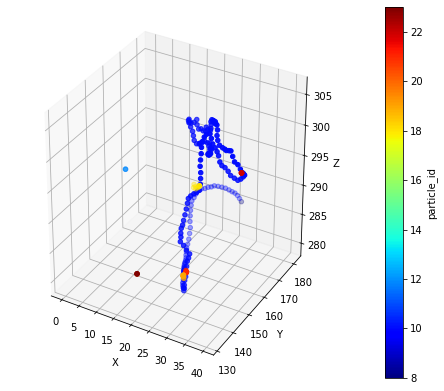

In [20]:
plot_3d_hits_double(event_hits, None, double = False, value = 'particle_id')

Por norma general, por lo que veo tenemos que del fotón energético de 2.46MeV salen muchos electrones por compton y fotoelectrico, pero el más energético entiendo que es el que hace toda la traza y se considera como bkg... El resto de electrones vemos que practicamente ni se mueven...

# CLOUDS Y FUNCIONES PARA LABELLING

Veamos qué hace el repositorio de clouds de JA.

## Cosas necesarias para hacer los histogramas

In [21]:
detector_frame = np.array([[[0] * 550]* 440]*440) 
#entiendo que mi array de imagen del detector sería algo asín, sin importar el contenido pero con el tamaño optimo

In [22]:
detector_frame.shape

(440, 440, 550)

Ahora, si quiero bines más grandes pero que las dimensiones coincidan (rollo que haya igual 440 de máximo pero que en vez de ir de uno en uno vayan de x en x) tengo que hacer img_shape con dimensión/x y poner un step = x en mi función, por ejemplo:

Esto lo hago en la función container creator. Dices pues quiero este tamaño total, este tamaño de voxel y te creo el detector_frame q te de estas características:

In [23]:
def container_creator(total_size, voxel_size):
    '''
    Creates a container of the required size in order to get the bin_creator() function create exactly the needed bins
    
    Args:
        total_size: TUPLE or LIST-like
    Maximum size of the container in each axis.
    
        voxel_size: TUPLE or LIST-like
    Size of the voxel for each axis.
    
    RETURN:
        img: NUMPYARRAY
    Container with the desired shape.
    
    '''
    xmaxsize, ymaxsize, zmaxsize = total_size[0], total_size[1], total_size[2]
    
    if voxel_size == None:
        voxel_size = (1., 1., 1.)
        
    xvoxsize, yvoxsize, zvoxsize = voxel_size[0], voxel_size[1], voxel_size[2]
    
    img = np.array([[[0] * int(zmaxsize / zvoxsize)] * int(ymaxsize / yvoxsize)] * int(xmaxsize / xvoxsize))
    return img

In [24]:
def container_creator_test(total_size, voxel_size):
    img = container_creator(total_size, voxel_size)
    
    for maxsize, voxsize, shape in zip(total_size, voxel_size, img.shape):
        assert int(maxsize/voxsize) == shape

In [25]:
total_size = (440, 440, 550) 
voxel_size = (5, 5, 5) #equivalent to step
start_bin = (-220, -220, 0) #equivalent to x0

Quizás adaptar las funciones para que en vez de poner total_size ponga simplemente max y min bin (este último sería x0), y con eso pos ya saco el totalsize obviamente.. y a mayores solo tendria que decir el step (voxel_size)

In [26]:
container_creator_test(total_size, voxel_size)

In [27]:
detector_frame = container_creator(total_size, voxel_size)

In [28]:
detector_frame.shape

(88, 88, 110)

Supongo que si quiero poner un step que no coincida bien con el tamaño max, puedo cambiar el tamaño max a algo más grande, ya que no importa si sobra (simplemente ningún hit se depositará ahí)

## Primera función que crea los bins en el detector

Toma img, que es un array de cierta dimensión y nos devuelve los bines en cada dimensión. Por ejemplo un array 2x5 con steps y x0 none nos devolverá un array [0, 1, 2] y otro [0, 1, 2, 3, 4, 5]. 

In [29]:
def bin_creator(img, steps = None, x0 = None):
    '''
    This function creates the bins for an histogram given a certain space.
    The size of the bins is controled by the steps and the max value of the bins by the img shape.
    
    Args:
        img: NUMPYARRAY
    Its shape provides the maximum value of the bins.
        
        steps: TUPLE (default = None)
    Desired distance between bins (i.e. bin size). The tuple size has to match img ndim.
        
        x0: TUPLE
    Desired lower value for the bins. The tuple size has to match img ndim.
    
    RETURN:
        bins: LIST OF ARRAYS
    It returns a ndim long list, in which each element is an array for a spatial coordinate with the desired bins.
    
    '''
    ndim  = img.ndim
    shape = img.shape
    steps = np.ones(ndim)  if steps is None else steps
    x0s   = np.zeros(ndim) if x0    is None else x0

    ibins = [np.linspace(0, n, n + 1) for n in shape]
    bins  = [x0 + step * ibin for x0, step, ibin in zip(x0s, steps, ibins)]
    
    return bins

In [30]:
def bins_test(img, steps = None, x0 = None):
    ndim  = img.ndim
    shape = img.shape
    
    bins = bin_creator(img, steps = steps, x0 = x0)
    
    assert len(bins) == ndim
    for length, bine, step, start in zip(shape, bins, steps, x0):
        assert len(bine) == length + 1 
        for n in bine:
            assert n == start
            start += step

Mirando en las cosas del año pasado tengo com que en x  e y van de -220 a +220 y luego en z va de 0 a 550... 

Por tanto el tamaño sería algo asín como 440, 440, 550... 

Para que coincida con las coordenadas, debo poner x0 en x e y con -220

In [31]:
bins_test(detector_frame, steps = voxel_size, x0 = start_bin)

In [32]:
detector_bins = bin_creator(detector_frame, steps = voxel_size, x0 = start_bin)

## Función para extraer los datos de MC necesarios en los histogramas

Puedo hacer una función chula que me coja las coordenadas de los hits mc, su energía, sus ids... etc de forma automática en lugar de hacer el tonto

Recordar: es exclusiva de MC simplemente por cómo se llaman las columnas del df

In [33]:
def get_mchits_info(nevent, df):
    '''
    Gets the N coordinates, the energy and the particle_id for MC hits.
    
    Args: 
        nevent: INT
    Number that matches event_id in the data frame
    
        df: DATAFRAME
    Dataframe with the MC hits of a file.
    
    RETURNS:
        mccoors: NUMPYARRAY
    Coordinates of the hits. (N, D)
    
        eners: NUMPYARRAY
    Energy of each hit. (N,)
    
        ids: NUMPYARRAY
    Particle identifyer of each hit. (N,)
    
    '''
    event = df.loc[df['event_id'] == nevent]
    xhits, yhits, zhits = event['x'], event['y'], event['z']
    
    mccoors = np.array([xhits, yhits, zhits]).T 
    eners   = np.array(event['energy'])
    ids     = np.array(event['particle_id'])
    return mccoors, eners, ids

In [34]:
def get_mchits_info_test(nevent, df):
    mccoors, eners, ids = get_mchits_info(nevent, df)
    
    assert mccoors.shape[0] == eners.shape[0] == ids.shape[0]
    assert eners.shape == ids.shape

In [35]:
get_mchits_info_test(nevent, mchits)

In [36]:
mccoors, eners, ids = get_mchits_info(nevent, mchits)

In [37]:
mccoors.shape, eners.shape, ids.shape

((217, 3), (217,), (217,))

## Crear un frame que se adapte a cada evento 

Básicamente es hacer una función que combine un poco lo del container_creator y el bin_creator, pero adaptándolo al tamaño justo (con cierta holgadura) del evento. Pienso que es importante que a pesar de todo los voxeles tengan las mismas coordenadas, es decir, forzar a que los bines coincidan con los del total... aljo así...

Por tanto como mínimo tuvimos que crear un detector_frame en el que le decíamos cual era el tamaño total y el de los voxeles a la función container_creator. Esto lo introducimos en bin_creator y obtenemos detector_bins. Estos serán la entrada de nuestra función de reducción (frame_reductor por ejemplo), junto con los hits, y pienso q nada más porque de los bins obtengo ya el step, de los bins con los minimum hits obtengo el x0 y de los bins con max y min hits obtengo el tamaño, todo lo necesario para volver a pasarle el container_creator y obtener el event_frame y con él crear los event_bins :)))

Tendrá de entrada supongo que el detector_frame, o directamente solo los bins del detector_frame (detector_bins i guess) non sei... 

El x0 serán los voxeles minimos en cada eje, el step lo decido yo

In [38]:
minx, maxx = mccoors[:, 0].min(), mccoors[:, 0].max()
miny, maxy = mccoors[:, 1].min(), mccoors[:, 1].max()
minz, maxz = mccoors[:, 2].min(), mccoors[:, 2].max()
print(minx, maxx, miny, maxy, minz, maxz)

-0.2290835 39.92656 131.5479 181.3721 279.6928 305.90567


In [39]:
detector_bins

[array([-220., -215., -210., -205., -200., -195., -190., -185., -180.,
        -175., -170., -165., -160., -155., -150., -145., -140., -135.,
        -130., -125., -120., -115., -110., -105., -100.,  -95.,  -90.,
         -85.,  -80.,  -75.,  -70.,  -65.,  -60.,  -55.,  -50.,  -45.,
         -40.,  -35.,  -30.,  -25.,  -20.,  -15.,  -10.,   -5.,    0.,
           5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,   45.,
          50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,   90.,
          95.,  100.,  105.,  110.,  115.,  120.,  125.,  130.,  135.,
         140.,  145.,  150.,  155.,  160.,  165.,  170.,  175.,  180.,
         185.,  190.,  195.,  200.,  205.,  210.,  215.,  220.]),
 array([-220., -215., -210., -205., -200., -195., -190., -185., -180.,
        -175., -170., -165., -160., -155., -150., -145., -140., -135.,
        -130., -125., -120., -115., -110., -105., -100.,  -95.,  -90.,
         -85.,  -80.,  -75.,  -70.,  -65.,  -60.,  -55.,  -50.,  -45.,
         -4

In [40]:
def closest_number_bins(innum, bin_array, step, ismin): #maybe add step as arg
    '''
    This function will round a number to its closest (but yet above it) number in an array. With above it, 
    it is meant that the original number would always fall inside the interval between the rounded number 
    in the array and 0 (this explanation is needed for negative numbers). 
    We want this to get the appropriate bin number depending on whether the number is the minimum or the 
    maximum coordinate in an event.    
    
    Args:
        innum: FLOAT
    Maximum or minimum coordinate for an axis for all the hits in an event.
    
        bin_array: NUMPYARRAY
    Bins for an axis.
    
        step: INT
    Size of the bins.
    
        ismin: BOOL
    True if the innum is the minimum coordinate of the event, False if it is the maximum.
    
    RETURN:
        outnum: FLOAT
    Desired number of the bin_array, closest to innum and containing it in an interval between outnum and 0.
    
    '''
    if innum < bin_array[0] or innum > bin_array[-1]:
        raise ValueError('Number out of bin boundaries')
        
    for i in range(len(bin_array) - 1): 
        if abs(bin_array[i] - innum) < step and abs(bin_array[i + 1] - innum) < step:
            if ismin == True:
                outnum = bin_array[i]
            else:
                outnum = bin_array[i + 1]     
    return outnum

In [41]:
def closest_number_bins_test():
    bins = np.array([-5, 0, 5]) #mock array
    step = abs(bins[0]-bins[1])
    assert closest_number_bins(-1, bins, step, True)   == -5
    assert closest_number_bins(-1, bins, step, False)  == 0
    assert closest_number_bins(2.4, bins, step, True)  == 0
    assert closest_number_bins(2.4, bins, step, False) == 5

In [42]:
closest_number_bins_test()

In [43]:
def frame_reductor(hits_coord, detector_bins, loose):
    '''
    This function will reduce the frame of work from the detector size to the size of the event in order
    to handle smaller containor arrays.
    
    Args:
        hits_coord: NUMPYARRAY
    Coordinates of the hits of an event.
    
        detector_bins: NUMPYARRAY
    Bins for the detector.
    
        loose: INT
    Number of blank voxels to add around the filled voxels in the 3 spatial dimensions.
    
    RETURNS:
        reduced_frame: NUMPYARRAY
    Adjusted frame to the event hits.
    
        reduced_bins: NUMPYARRAY
    Adjusted bins to the event hits.
    
    '''
    steps = [abs(bins[0] - bins[1]) for bins in detector_bins]
    extremes = [[coor.min(), coor.max()] for coor in hits_coord.T]
    extreme_bins = [[closest_number_bins(ex[0], bins, step, True), closest_number_bins(ex[1], bins, step, False)] 
    for ex, bins, step in zip(extremes, detector_bins, steps)]
    
    x0 = [x[0] - loose * step for x, step in zip(extreme_bins, steps)]
    reduced_size = [abs(ex_bin[0] - ex_bin[1]) + 2 * loose * step 
                         for ex_bin, step in zip(extreme_bins, steps)]
    reduced_frame = container_creator(reduced_size, steps)
    reduced_bins = bin_creator(reduced_frame, steps = steps, x0 = x0)
    
    return reduced_frame, reduced_bins

In [44]:
def frame_reductor_test(nevent, df, total_size, steps = None, x0 = None):
    img  = container_creator(total_size, steps)
    bins = bin_creator(img, steps = steps, x0 = x0)
    mccoors, mcenes, hits_id = get_mchits_info(nevent, df)
    
    reduced_img, reduced_bins = frame_reductor(mccoors, bins, 2)
    
    assert reduced_img.ndim == img.ndim
    for b, B in zip(reduced_bins, bins):
        assert all(np.isin(b, B))

In [45]:
frame_reductor_test(nevent, mchits, total_size, steps = voxel_size, x0 = start_bin)

In [46]:
loose = 2

In [47]:
reduced_frame, reduced_bins = frame_reductor(mccoors, detector_bins, loose)

In [48]:
detector_frame.shape

(88, 88, 110)

## Histograma de energías para los hits

Estas funciones siempre las puedo hacer algo más... completas, rollo metiendo dentro la función de coger las coors y las mcenes... no sé. 

Supongo que por ejemplo meter la función container_creator no tiene sentido porque cada vez que quisiera hacer para un evento el histograma me calcularía el img que no hace falta para nada!! En el test lo meto porque es algo que corres una vez así que sin fallo

In [49]:
def mcimg(mccoors, mcenes, bins):
    '''
    This function creates a D-dimensional histogram weighted with the energies of particle hits.
    Thus, it voxelizes the space with certain voxel size and each voxel will contain the energy of
    the hits that fall inside.
    
    Args:
        mccoors: NUMPYARRAY
    Coordinates of the particle hits. Having N hits, this sould be shaped as (N, D).
    
        mcenes: NUMPYARRAY
    Energies of the particle hits. Having N hits, hits should be shaped as (N,).
    
        bins: LIST OF ARRAYS
    D-dim long list, in which each element is an array for a spatial coordinate with the desired bins.
    It matches the bins local variable.
    
    RETURN:
        mcimg: NUMPYARRAY
    D-dimensional histogram with the energy counting in the appropriate bin.
    '''
    mcimg, _  = np.histogramdd(mccoors, bins, weights = mcenes)
    
    return mcimg

In [50]:
def mcimg_test(nevent, df, total_size, steps = None, x0 = None):
    img  = container_creator(total_size, steps)
    bins = bin_creator(img, steps = steps, x0 = x0)
    mccoors, mcenes, ids = get_mchits_info(nevent, df)
    
    voxel_ener = mcimg(mccoors, mcenes, bins)
    
    assert voxel_ener.shape == img.shape
    assert sum(voxel_ener.flatten()) == sum(mcenes)

Esta primera función tiene como input img, que será un array (en mi caso de 3 dimensiones, x y z) donde tendremos las dimensiones de la imagen total del detector

Luego tiene mccoors, que serán las coordenadas de los hits; mcenes, las energías correspondientes que se toman como weight del histograma. Step y x0 es lo mismo que para bin_creator()

## Ejemplo de creación del histograma de energías

Vamos a usar el mcimg

In [51]:
mcimg_test(nevent, mchits, total_size, steps = voxel_size, x0 = start_bin)

In [52]:
histog = mcimg(mccoors, eners, reduced_bins)

In [53]:
histog.max()

0.24853503075428307

Veamos qué coordenadas (DEL ARRAY) son las que tengo que plottear

In [54]:
nonzero = histog.nonzero()

In [55]:
nonzero #posiciones no nulas del array

(array([ 2,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9, 10, 10, 10]),
 array([ 9,  8,  8,  9,  9, 10,  2,  5,  6,  7,  7,  8,  8, 10, 11,  4,  4,
         4,  5,  5,  5,  6,  7,  7,  8, 11, 12,  4,  4,  4,  5,  5,  5,  6,
         6,  6,  7,  5,  6,  6]),
 array([4, 2, 3, 3, 4, 4, 4, 3, 3, 2, 7, 2, 7, 4, 4, 3, 4, 5, 3, 5, 6, 7,
        7, 8, 7, 4, 4, 4, 6, 7, 6, 7, 8, 6, 7, 8, 8, 7, 6, 7]))

In [56]:
histog[nonzero] #valor numerico de las coordenadas, es decir, la energía

array([0.0294521 , 0.00462884, 0.02208186, 0.01594689, 0.02692485,
       0.15983683, 0.0297813 , 0.01396338, 0.03704994, 0.02443085,
       0.05078199, 0.00545287, 0.05931545, 0.0045237 , 0.02178582,
       0.21841832, 0.0452331 , 0.01852207, 0.03026272, 0.01269258,
       0.01753249, 0.01334065, 0.24853503, 0.03022973, 0.01077164,
       0.01163888, 0.01263679, 0.01050988, 0.00708666, 0.00190909,
       0.01421488, 0.04124441, 0.01170475, 0.01407771, 0.05323615,
       0.01546468, 0.00872785, 0.01874946, 0.03151768, 0.06043198])

## Funciones para plotear los datos de histogramas directamente, tanto los hits voxelizados como los voxeles en sí (si lo pasamos a coordenadas, tengo la función en NEXTSPARTSECONVNET pienso)

La funcion q viene intentará visualizar los resultados estes

In [57]:
def plot_3d_histo_hits(hist, bins, cmap = mpl.cm.jet, clabel = 'Energy'):
    '''
    This function plots the 3 dimension histogram created from the particles hits.
    Is a scatter of the bins central positions in order to appreciate all of them.
    
    Args:
        hist: NUMPYARRAY
    Histogram of the particle hits of an event (from mcimg function)
        bins: LIST OF ARRAYS
    D-dim long list, in which each element is an array for a spatial coordinate with the desired bins.
    It will give us the correct positions of the hits. (from mcimg function)


    '''
    #Función para ver los puntos del histograma, siendo los colores la frecuencia de aparicion es decir, las veces
    #que un hit cayó en un bin
    nonzero = hist.nonzero() #non zero position of the values, i.e. the localization of the points to plot
    
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=hist.min(), vmax=hist.max())

    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(hist[nonzero])) #aqui los valores del histo
    colors = np.rollaxis(colors, 0, 2)
    
    
    ax.scatter(bins[0][nonzero[0]], bins[1][nonzero[1]], bins[2][nonzero[2]], c=colors, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')

    
    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    cb.set_label(clabel)
    plt.show()

In [58]:
def plot_3d_histo_vox(hist, bins, th=0, square_voxels = False, edgecolor=None, cmap=mpl.cm.jet, clabel = 'Energy'):
    '''
    This function plots the 3 dimension histogram created from the particles hits.
    This shows the voxels with the containing energy. Note that the axis labels dont represent 
    
    Args:
        hist: NUMPYARRAY
    Histogram of the particle hits of an event (from mcimg function)
    
        bins: LIST OF ARRAYS
    D-dim long list, in which each element is an array for a spatial coordinate with the desired bins.
    It will give us the correct positions of the hits. (from mcimg function)
    
        th: FLOAT (default = 0)
    Threshold for the minimum value of the voxels.
    
        square_voxels: BOOL (default = False)
    If True, the plot will show square voxels because it scales the plot to be equal in each axis.
    '''
    
    nonzero = hist.nonzero()
    xmin, xmax = nonzero[0].min(), nonzero[0].max()
    ymin, ymax = nonzero[1].min(), nonzero[1].max()
    zmin, zmax = nonzero[2].min(), nonzero[2].max()

    nbinsX = int(np.ceil((xmax-xmin))) + 2 #esto marca el rango del plot que se verá (el +2 es para que quede 'holgado')
    nbinsY = int(np.ceil((ymax-ymin))) + 2
    nbinsZ = int(np.ceil((zmax-zmin))) + 2
    
    if square_voxels == True:
        nbinmax = max(nbinsX, nbinsY, nbinsZ) 
        nbinsX, nbinsY, nbinsZ = nbinmax, nbinmax, nbinmax
    
    xarr = np.ones(shape=(nbinsX, nbinsY, nbinsZ))*th

    nonzeros = np.vstack([nonzero[0]-xmin+1, #esto como que hace que los voxeles se ploteen reseteando posiciones
                          nonzero[1]-ymin+1, #es decir, si la posicion mas baja del eje x es 15 y la más alta 20
                          nonzero[2]-zmin+1]) #esto hará que se pase a 1 y 5
    xarr[tuple(nonzeros)] = hist[nonzero]
    dim     = xarr.shape
    voxels  = xarr > th

    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=xarr.min(), vmax=xarr.max())
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(xarr))
    colors = np.rollaxis(colors, 0, 4)

    ax.voxels(voxels, facecolors=colors, edgecolor=edgecolor)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')
    
    ax.set_xlabel('X ')
    ax.set_xticks(np.arange(nbinsX))
    ax.set_xticklabels([int(i) for i in np.unique(bins[0][nonzero[0]])], rotation = 45)
    ax.set_ylabel('Y ')
    ax.set_yticks(np.arange(nbinsY))
    ax.set_yticklabels([int(i) for i in np.unique(bins[1][nonzero[1]])], rotation = -45)
    ax.set_zlabel('Z ')
    ax.set_zticks(np.arange(nbinsZ))
    ax.set_zticklabels([int(i) for i in np.unique(bins[2][nonzero[2]])])
    cb.set_label(clabel)

    plt.show()

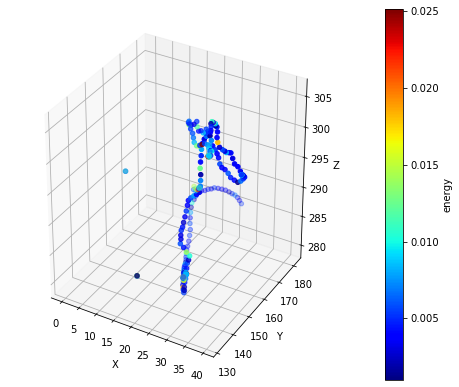

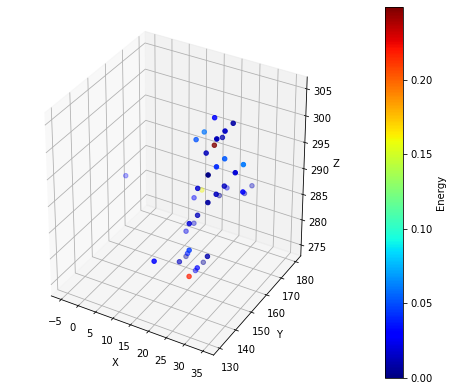

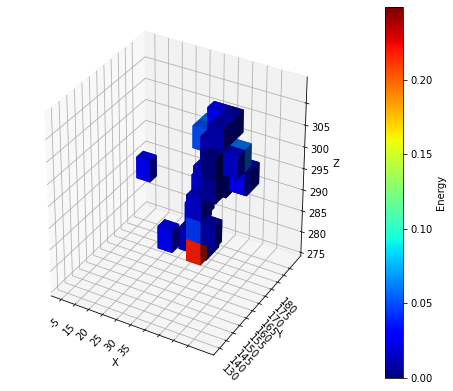

In [59]:
plot_3d_hits_double(event_hits, None, double = False, value = 'energy')
plot_3d_histo_hits(histog, reduced_bins)
plot_3d_histo_vox(histog, reduced_bins)

## Aquí exploro un poco lo que es la función mcblobs pero no llego a una conclusión muy sólida...

In [60]:
def cells_selection(cells, sel):
    return [cell[sel] for cell in cells]

In [61]:
def mcblobs(img, mccoors, mcenes, mcids, bins):
    
    mcblob = np.zeros(img.shape).flatten() #array of zeros with the size of xbinlen * ybinlen * zbinlen
    
    for i in (1, 2): 
        sel     = mcids == i
        if (np.sum(sel) <= 0): continue
        icoors  = cells_selection(mccoors, sel) 

        etrk, _ = np.histogramdd(icoors, bins, weights = mcenes[sel])
        
        imask   = np.argmax(etrk) #busca el bin con mayor energía (da la posicion como entero, es decir, para localizarlo en un flatten)
        mcblob[imask] = etrk.flatten()[imask] #mete en el mapa de coordenadas vacío el voxel con el valor más grande del histograma anterior...

    return mcblob.reshape(img.shape)

## mcids es un array que por hit tendrá un 1 si es del electron, un 2 si es del positron y un 0 si es otra cosa (por ejemplo)

In [62]:
mcids = []
for i in range(len(eners)):
    mcids.append(random.randint(0, 2))
mcids = np.array(mcids)

In [63]:
blob = mcblobs(reduced_frame, mccoors.T, eners, mcids, reduced_bins) 

In [64]:
blob.max()

0.08846059395000339

In [65]:
blob.nonzero()

(array([8]), array([7]), array([7]))

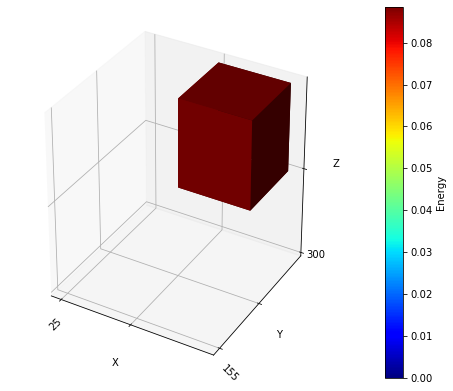

In [66]:
plot_3d_histo_vox(blob, reduced_bins)

La funcion mcblobs parece que en general lo que hace es clasificar ciertas coordenadas de montecarlo (no sé si el input son todas como hacía antes. No parece porque hace cositas raras con unas listas y tal con la funcion cells_selection, pero no lo sé muy bien...). 

Luego, busca el voxel que contiene más energía y finalmente nos devuelve un histograma de un único voxel, el más energético (los demás contienen 0)

### Finalmente concluyo que esta función simplemente escoge el voxel más energético de cada partícula importante y dice... pues esto es un blob PUNTO

## Función de labeling para los IDs de los hits (en este caso probamos con ID de partícula pero luego serán simplemente labels de segmentación)

Veamos ahora como podemos hacer clasificación de voxeles según la particula que tenga más energía en los hits dentro de cada voxel..

In [67]:
unique_parts = np.unique(ids)

In [68]:
#for i, uniq in enumerate(unique_parts):
 #   ids = np.where(ids == uniq, i + 1, ids)

Idea: quizás hay que hacer un histograma por cada partícula, y luego comparar los histogramas para ver cual voxel tiene el mayor número de eventos de dicho tipo?? NON


Lo que queremos no es la mayor frecuencia de particulas de un tipo, sino las más energéticas... rollo la partícula que deposite más energía de un sólo tipo... entonces pos eso, puedo hacer un histograma de energía por cada partícula (en lugar de un histograma de frecuencia de particulas...)

Para eso entiendo que en cada evento tengo que ver qué hits hay de cada partícula 

In [69]:
len(ids) 

217

In [70]:
len(mccoors)

217

Creo como una máscara para cada partícula...

In [71]:
part_id_mask = ids == 24

In [72]:
len(eners[part_id_mask])

0

Lo que queremos es que por ejemplo, si en un voxel caen 8 hits y son de la siguiente forma:
- Hit 'a': 3 hits de energías 2, 2, 4    ---> total = 8
- Hit 'b': 1 hit  de energía  6          ---> total = 6
- Hit 'c': 4 hits de energías 1, 1, 2, 1 ---> total = 5

Finalmente, ese voxel se etiquetará como hit 'a' por ser el tipo de hit que deposita más energía

In [73]:
def labelling(img, mccoors, mcenes, hits_id, bins):
    '''
    This function creates a D-dimensional array that corresponds a voxelized space (we will call it histogram).
    The bins of this histogram will take the value of the ID hits that deposit more energy within them.
    
    i.e., in a voxel with several hits, the function will label the voxel as the kind of hit that layed more energy,
    regardless of the number of hits. For a 8 hit voxel:
     - Hit A kind: 3 hits with energies 2, 2, 4    ---> total = 8
     - Hit B kind: 1 hit  with energy   6          ---> total = 6
     - Hit C kind: 4 hits with energies 1, 1, 2, 1 ---> total = 5
    This voxel will be labelled as kind A.
    
    The IDs of the hits may be the kind of particle, or even the segmentation classes (track, blob, other...)
    Also, gives an histogram of the energies of the hits for each voxel, using mcimg function.
    
    Args:
        img: NUMPYARRAY
    Frame to contain the event.
    
        mccoors: NUMPYARRAY
    Coordinates of the particle hits. Having N hits, this sould be shaped as (N, D).
    
        mcenes: NUMPYARRAY
    Energies of the particle hits. Having N hits, this should be shaped as (N,).
    
        hits_id: NUMPYARRAY
    IDs for each hit. They define the kind of voxeles we will have. Having N hits, this should be shaped as (N,).
    
        bins: LIST OF ARRAYS
    D-dim long list, in which each element is an array for a spatial coordinate with the desired bins.
    
    RETURN:
        mc_hit_id: NUMPYARRAY
    D-dimensional histogram with the IDs for the voxels.
    
        mc_hit_ener: NUMPYARRAY
    D-dimensional histogram with the energies of the voxels.
    
        mc_hit_portion: NUMPYARRAY
    D-dimensional histogram with the ratio of the energy of the most important particle to the total energy, per voxel.
    
    '''
    
    mc_hit_id      = np.zeros(img.shape)   #array 3d a llenar con los identificadores
    mc_hit_portion = np.zeros(img.shape)   #array 3d a llenar con el porcentaje de energía de la total que se lleva la partícula más importante
    unique_hits    = np.unique(hits_id)    #lista de identificadores de los hits (identificador puede ser tipo de particula, label, etc...)
    
    mc_hit_ener    = mcimg(mccoors, mcenes, bins) #histograma de energías 

    #Bucle en los identificadores de los hits para hacer un histograma de energía por tipo de hit
    histograms, nonzero = [], []        #lista de histogramas y de sus coordenadas no nulas

    for hit_id in unique_hits:
        hit_id_mask = hits_id == hit_id                           #mascara de cada tipo de hit
        vox, _ = np.histogramdd(mccoors[hit_id_mask], 
                                bins, 
                                weights = mcenes[hit_id_mask]) #histograma de energia por tipo de hit
        histograms.append(vox)                                 #lista de histogramas
        nonzero.append(np.array(vox.nonzero()).T)              #lista con las coordenadas no nulas
    
    #Bucle recorriendo los voxeles no nulos para comparar el valor de cada histograma
    
    for nz in nonzero: #recorre cada tipo de hit con voxeles no nulos particulares (los hits tipo 1 cayeron en ciertos voxeles, los tipo 2 en otros etc...)
        for i in nz:   #aqui recorre cada coordenada de cada tipo de hit
            nonzero_coors = tuple(i) 
            
            if mc_hit_id[nonzero_coors] != 0 and mc_hit_portion[nonzero_coors] != 0: 
                continue        #si cierto voxel ya ha sido llenado (es decir, si su valor no es cero)
                                #pasamos de volver a hacerle cosas
                
            #Bucle en los histogramas para ver cual tiene el valor más grande en cada voxel, 
            #revelándome así qué tipo de voxel es
            
            vox_eners = [] #contenedor de los valores de voxel para todos los histogramas
            for histo in histograms:
                vox_eners.append(histo[nonzero_coors]) 
                
            vox_eners = np.array(vox_eners)
            assert len(vox_eners) == len(unique_hits) 
            selected_id = vox_eners.argmax() #mira la posición del elemento mayor en vox_eners
            mc_hit_id[nonzero_coors] = unique_hits[selected_id]   #toma dicha posición de la lista unique_hits y se la asigna a la posición correspondiente en el array vacío 
            
            max_ener   = vox_eners[selected_id]     #energía de la partícula más importante en un voxel 
            total_ener = mc_hit_ener[nonzero_coors] #la energía total contenida en ese voxel
            mc_hit_portion[nonzero_coors] = max_ener / total_ener
            
    return mc_hit_id, mc_hit_ener, mc_hit_portion

In [74]:
def labelling_test(nevent, df, total_size, steps = None, x0 = None):
    img  = container_creator(total_size, steps)
    bins = bin_creator(img, steps = steps, x0 = x0)
    mccoors, mcenes, hits_id = get_mchits_info(nevent, df)
    
    voxel_id, voxel_ener, voxel_portion = labelling(img, mccoors, mcenes, hits_id, bins)
    
    id_nonzero   = voxel_id.nonzero()
    ener_nonzero = voxel_ener.nonzero()
    port_nonzero = voxel_portion.nonzero()
    
    voxel_id_unique = np.unique(voxel_id)
    voxel_id_unique = voxel_id_unique[voxel_id_unique != 0]
    id_unique       = np.unique(hits_id)
        
    assert voxel_id.shape == voxel_ener.shape == voxel_portion.shape == img.shape
    assert len(id_nonzero) == len(ener_nonzero) == len(port_nonzero)
    assert len(id_nonzero[0]) == len(ener_nonzero[0]) == len(port_nonzero[0])
    assert voxel_portion.max() <= 1. 
    assert all(np.isin(voxel_id_unique, id_unique))
    for i in range(len(ener_nonzero)):
        assert (ener_nonzero[i] == id_nonzero[i]).all() #check if they are the same nonzero coordinates
        assert (ener_nonzero[i] == port_nonzero[i]).all()

Quizás por limpieza del código hago de esto una función solite pero no lo se :)

## NOTA: 
el histograma de ratios este nos servirá no sólo para saber lo bien que están escogidos los voxeles (y así poder justificar cosas), sino también supongo que lo podremos usar como peso a cada voxel una vez entrenando, dándole más peso a los vóxeles que son FOR SURE de un tipo y menos peso a los que son mezcla...

In [75]:
labelling_test(nevent, mchits, total_size, steps = voxel_size, x0 = start_bin)

In [76]:
particle_voxel, ener_voxel, percentage_voxel = labelling(reduced_frame, mccoors, eners, ids, reduced_bins)

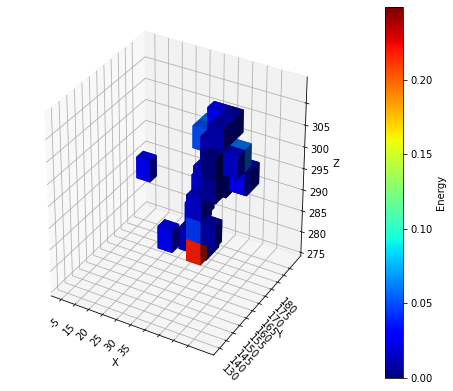

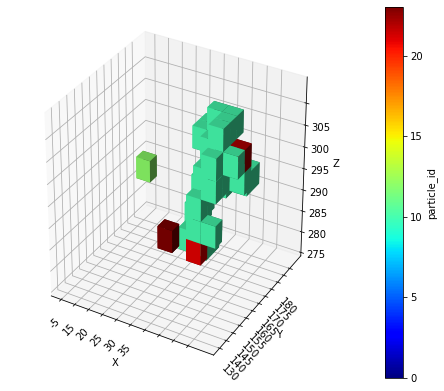

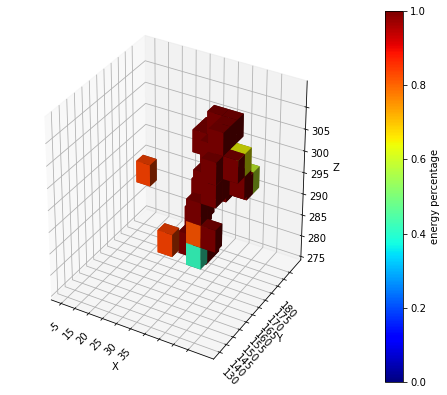

In [77]:
plot_3d_histo_vox(ener_voxel, reduced_bins)
plot_3d_histo_vox(particle_voxel, reduced_bins, clabel = 'particle_id')
plot_3d_histo_vox(percentage_voxel, reduced_bins, clabel = 'energy percentage')

Vale, esto luce que funciona bien, pero lo que nos gustaría hacer es en vez de que cada hit sea una partícula, que cada hit sea un label de segmentación

La mayor parte del tiempo ambas coinciden salvo para la traza principal, donde hits de un electrón según en qué parte estén, serán traza o blob...

Lo gordo de relacionar voxel con la partícula que deposita más energía ya está... ahora sería lo mismo cambiando partículas por label... rollo en vez de que un hit se etiquete con un particle_id que se etiquete con un label y ya está, pero la función es la misma... cambiaría sólo el valor del argumento ids :)

## Problema de los 0 y los NaN

Si algun ID es 0 tenemos problem porque hacer lo de NaN no cunde demasiado, porque una vez sale el histograma no le puedes hacer lo de .nonzero() porque los NaN son nonzero tambien!! no te los descarta..

Mirar lo de los Nan... SI NO CONSIGO ARREGLAR LO DE LOS NAN, RECORDAR QUE LAS LABELS NO PUEDEN EMPEZAR EN 0 ENTON, SINO EN 1

Si cambio lo de las NaN adaptar tb el test!!!

### Tener bien claro que hay como dos niveles: el histograma y las coordenadas
- El histograma es un array de la forma del detector con algunos elementos con cierto valor
- Las coordenadas vienen de extraer la información del histograma y obtener así la posición y las características de cada voxel, cosa que necesitaríamos para el input de la red neuronal

Ahora mismo aqui tengo funciones de plot para el nivel histograma, pero por ahí tengo plots de voxel para nivel coordenadas tb (que ha de ser análogo porque estas las saqué de esas...)

## Función que extrae [coords, eners, IDs] del histograma, para meterlos facilmente como datos etc

Con ese histograma de salida y esos bins, yo puedo sacar unas coordenadas y un valor que será lo que después añada a los datos... hago una función para eso:

In [93]:
def histog_to_coord(event_id, id_hist, ener_hist, ratio_hist, bins, binclass = None):
    '''
    Takes the histogram (i.e. any voxelization) and returns an array of the voxel coordinates, their energies and
    ratio energies, and their feature
    (the feature can be things like particle ID or segmentation labels).
    
    Args:
        id_hist: NUMPYARRAY
    D-dimensional histogram with an ID for each voxel.
    
        ener_hist: NUMPYARRAY
    D-dimensional histogram with the energy for each voxel.
    
        ratio_hist: NUMPYARRAY
    D-dimensional histogram with the ratio of the energy of the most important particle to the total energy, per voxel.
    
        bins: LIST OF ARRAYS
    D-dim long list, in which each element is an array for a spatial coordinate with the desired bins.
    
        binclass: INT
    Number to identificate the type of event (signal or background)
    
    RETURN:
        df: DATAFRAME
    Coordinates of the nonzero voxels, their features and binclass, with the structure (D-coords, eners,
    ratio, features, binclass). The df has the length of the number of nonzero elements in the histogram.
    '''
    
    column_names  = ['x', 'y', 'z', 'ener', 'ratio', 'segclass', 'binclass']
    ndim          = ener_hist.ndim
    ener_nonzero  = ener_hist.nonzero()
    id_nonzero    = id_hist.nonzero()
    ratio_nonzero = ratio_hist.nonzero()
    
    nonzero = id_nonzero
    coord   = []
    for i in range(ndim):
        coord.append(bins[i][nonzero[i]])

    coord.append(ener_hist[nonzero])
    coord.append(ratio_hist[nonzero])
    coord.append(id_hist[nonzero])
    coord.append(binclass)
    
    data = {}
    data['event_id'] = event_id
    for col, value in zip(column_names, coord):
        data[col] = value
    
    df = pd.DataFrame(data)
    return df

In [88]:
def histog_to_coord_test(nevent, df, total_size, steps = None, x0 = None):
    img = container_creator(total_size, steps)
    bins = bin_creator(img, steps = steps, x0 = x0)

    mccoors, mcenes, hits_id = get_mchits_info(nevent, df)
    
    voxel_id, voxel_ener, voxel_ratio = labelling(img, mccoors, mcenes, hits_id, bins)
    coords = histog_to_coord(nevent, voxel_id, voxel_ener, voxel_ratio, bins)
    
    xcoor, ycoor, zcoor, eners, ratio, ids, binclass = coords.x, coords.y, coords.z, coords.ener, coords.ratio, coords.segclass, coords.binclass
    assert len(xcoor) == len(ycoor) == len(zcoor) == len(eners) == len(ratio) == len(ids) == len(binclass)
    assert all(np.isin(xcoor, bins[0]))
    assert all(np.isin(ycoor, bins[1]))
    assert all(np.isin(zcoor, bins[2]))
    assert all(np.isin(eners, voxel_ener))
    assert all(np.isin(ratio, voxel_ratio))
    assert all(np.isin(ids, hits_id))

In [89]:
histog_to_coord_test(nevent, mchits, total_size, steps = voxel_size, x0 = start_bin)

In [91]:
coords = histog_to_coord(nevent, particle_voxel, ener_voxel, percentage_voxel, reduced_bins)

In [92]:
coords #aqui segclass no es segclass, sino que es 

,event_id,x,y,z,ener,ratio,segclass,binclass
0,48000024,-5.0,165.0,285.0,0.029452,0.837883,12.0,None
1,48000024,15.0,160.0,275.0,0.004629,1.000000,10.0,None
2,48000024,15.0,160.0,280.0,0.022082,1.000000,10.0,None
3,48000024,15.0,165.0,280.0,0.015947,1.000000,10.0,None
4,48000024,15.0,165.0,285.0,0.026925,1.000000,10.0,None
5,48000024,15.0,170.0,285.0,0.159837,0.909479,18.0,None
6,48000024,20.0,130.0,285.0,0.029781,0.839675,23.0,None
7,48000024,20.0,145.0,280.0,0.013963,1.000000,10.0,None
8,48000024,20.0,150.0,280.0,0.037050,1.000000,10.0,None
9,48000024,20.0,155.0,275.0,0.024431,1.000000,10.0,None


## Supongo que las funciones de test las tengo que meter en el archivo equivalente_test.py y luego en el archivo conftest.py meter cosas como el archivo a probar, o las variables iniciales tipo nevent tal

## Estructura
- Primero con un total_size (del detector) y un voxel_size hacer el detector_frame con la función container_creator
- Luego con detector_frame, voxel_size y un x0 en la función bin_creator extraer detector_bins
- POR CADA EVENTO, tras obtener los datos importantes del evento con get_mchits_info utilizamos las mccoors, los detector_bins y un loose (parámetro de holgadura para los voxeles a mayores que necesitamos), creamos el reduced_frame con sus respectivos reduced_bins por cada evento.
- Entonces basándome en esto, voy a quitar creo las variables steps y x0 de las funciones de labelling y mcimg y e introducir la variable bins directamente, en lugar de calcular cada vez los bins

### Un poco la estructura del repositorio

Tambien tener en cuenta que algunas funciones son requeridas para obtener el input de otra, y otras son requeridas porque en el interior de las funciones target se usan (es el caso de bins, que está dentro de mcimg, y el del propio mcimg que está dentro de labelling)

En general todo son utils para la función labelling... que es como el objetivo final

El otro objetivo final sería obtener los labels de segmentación para usarlos con dicha función :)

In [84]:
import pandas as pd

pd.cut(mccoors.T[0], reduced_bins[0], labels = np.arange(0, len(reduced_bins[0]) - 1)).astype(int)

array([ 8,  2,  2,  2,  2,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8, 10, 10, 10, 10, 10,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7])

El cut este es otra forma de voxelizar... metes las coordenadas y los bins y te dice a que intervalo pertenece cada hit... Yo en mi caso hice algo parecido pero directamente construyendo el histograma en 3 dimensiones y de ahi pues saco donde está cada bicho, y además con la energía ya por voxel, parece algo más automático